In [137]:
import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
import matplotlib.patches as mpatches
import matplotlib as mpl

def get_accuracy(label, label_):
    """Find best permutation of cluster labels to true labels."""
    accs = []
    for perm in permutations(np.unique(label_)):
        label__ = label_.copy()
        for i, p in enumerate(perm):
            label__[label_ == i] = p
        accs.append(np.mean(label == label__))
    return np.max(accs)

# Compare 2 and 3 ring ensembles across data size

In [26]:
# parameters
global_seed = 238476
num_neuron_train = 50
num_neuron_test = 50
num_neuron = num_neuron_train + num_neuron_test
dim = 1
num_hidden = 16
num_rep = 20
num_rep2 = 5 # train our models this often and pick best LLH
num_data = np.array([64, 128, 256, 512, 1024, 2048])

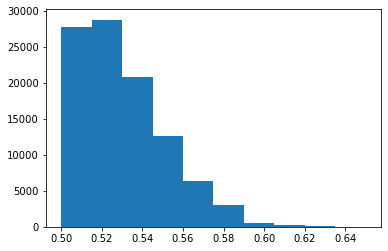

[0.5   0.525 0.57 ]


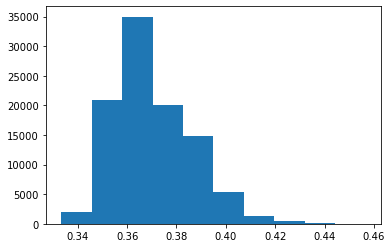

[0.35 0.37 0.4 ]


In [25]:
# compute chancel level

num_neuron = 100
num_rep = 100000

chance_quantiles = []

for num_ensemble in [2, 3]:
    accuracy = np.zeros(num_rep)

    label = np.zeros(num_neuron * num_ensemble)
    for i in range(num_ensemble):
        label[i * num_neuron : (i+1) * num_neuron] = i

    for i in range(num_rep):
        random_label = np.random.choice(
            np.arange(num_ensemble),
            num_neuron * num_ensemble,
            replace=True
        )
        accuracy[i] = get_accuracy(label, random_label)

    plt.hist(accuracy)
    plt.show()
    chance_quantiles.append(np.quantile(accuracy, [.05, .5, .95]))
    print(chance_quantiles[-1])

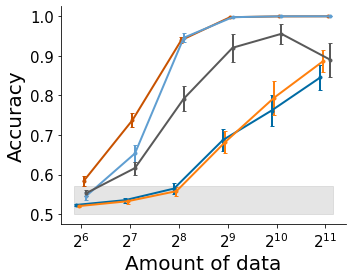

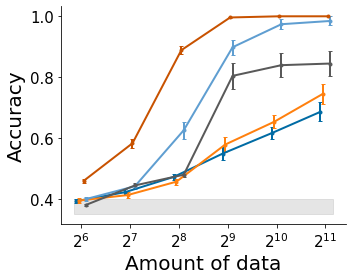

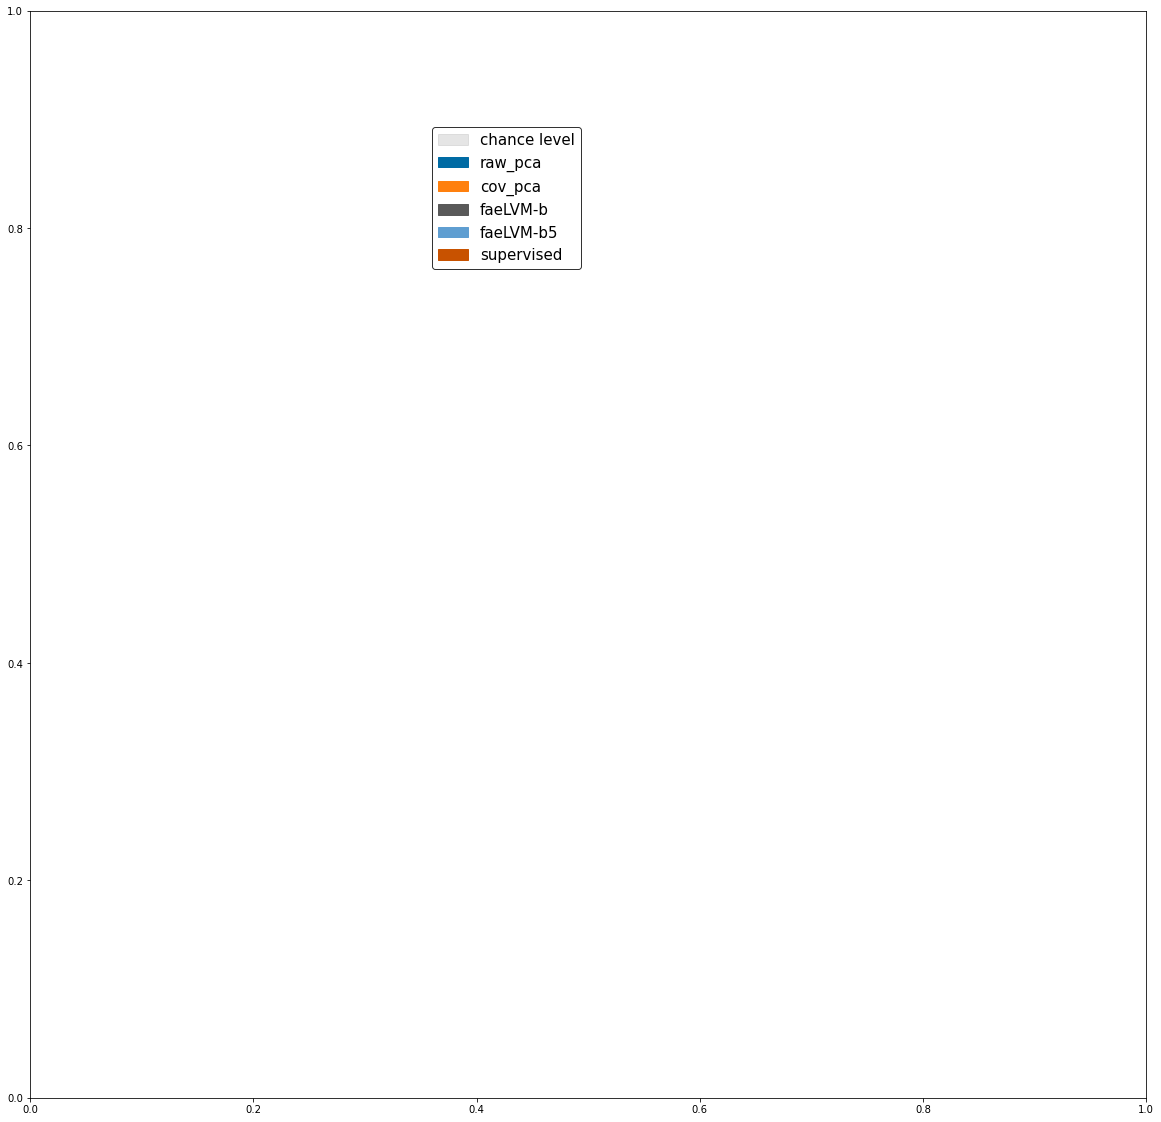

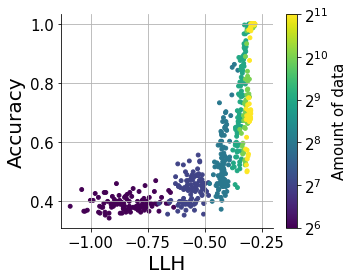

In [199]:
# plot results
plt.style.use('tableau-colorblind10')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#006BA4", "#FF800E", "#C85200", "#5F9ED1", "#595959", "#898989", "#A2C8EC", "#FFBC79", "#CFCFCF"]) 

#axes.prop_cycle: cycler(color, [#006BA4, #FF800E, #ABABAB, #595959,
                #5F9ED1, #C85200, #898989, #A2C8EC, #FFBC79, #CFCFCF])

labels = ['chance level', 'raw_pca', 'cov_pca', #'cov_agg', 
          'supervised', 'faeLVM-b5', 'faeLVM-b']
handles = []


fig1, ax1 = plt.subplots(1,1, figsize=(5,4))
fig2, ax2 = plt.subplots(1,1, figsize=(5,4))
fig3, ax3 = plt.subplots(1,1, figsize=(20,20))
fig4, ax4 = plt.subplots(1,1, figsize=(5,4))

accuracies = np.load('fig3_2rings.npy')
ax1.fill_between(
    [5.85, len(num_data) + 5.15],
    [chance_quantiles[0][0], chance_quantiles[0][0]],
    [chance_quantiles[0][2], chance_quantiles[0][2]],
    alpha=.3, color='#ABABAB'
)
for i in range(5):
    if i==2:
        continue
    ax1.errorbar(
        np.log2(num_data) + (i-2)/20, 
        accuracies[i].mean(1), 
        accuracies[i].std(1)/(np.sqrt(accuracies[i].shape[1])),
        fmt='.-', capsize=2, linewidth=2
    )
    
accuracies = np.load('fig3_2rings_single_rep.npy')
ax1.errorbar(
    np.log2(num_data) + (i-2)/20, 
    accuracies[i].mean(1), 
    accuracies[i].std(1)/(np.sqrt(accuracies[i].shape[1])),
    fmt='.-', capsize=2, linewidth=2
)

ax1.set_xticks(np.log2(num_data), [r'$2^6$',r'$2^7$',r'$2^8$',r'$2^9$',r'$2^{10}$',r'$2^{11}$'], fontsize=15)
ax1.set_xlabel("Amount of data", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=20)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
fig1.tight_layout()


accuracies = np.load('fig3_3rings.npy')
handles.append(
    ax2.fill_between(
        [5.85, len(num_data) + 5.15],
        [chance_quantiles[1][0], chance_quantiles[1][0]],
        [chance_quantiles[1][2], chance_quantiles[1][2]],
        alpha=.3, color='#ABABAB',
    )
)
for i in range(5):
    if i==2:
        continue
    handles.append(
        ax2.errorbar(
            np.log2(num_data) + (i-2)/20, 
            accuracies[i].mean(1), 
            accuracies[i].std(1)/(np.sqrt(accuracies[i].shape[1])),
            fmt='.-', capsize=2, linewidth=2
        )
    )    
    
accuracies = np.load('fig3_3rings_single_rep.npy')
handles.append(
    ax2.errorbar(
        np.log2(num_data) + (i-2)/20, 
        accuracies[i].mean(1), 
        accuracies[i].std(1)/(np.sqrt(accuracies[i].shape[1])),
        fmt='.-', capsize=2, linewidth=2
    )
)

ax2.set_xticks(np.log2(num_data), [r'$2^6$',r'$2^7$',r'$2^8$',r'$2^9$',r'$2^{10}$',r'$2^{11}$'], fontsize=15)
ax2.set_xlabel("Amount of data", fontsize=20)
ax2.set_ylabel("Accuracy", fontsize=20)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
fig2.tight_layout()



colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# alpha=0.3 diffuse, alpah=1 solid
patches = [mpatches.Patch(color=colors[i-1], label=labels[i], alpha=1) for i in range(len(labels))]
patches[0].set_facecolor('#ABABAB')
patches[0].set_edgecolor('#ABABAB')
patches[0].set_alpha(0.3)
patch_list = patches[0:3] + patches[5:] + patches[4:5] + patches[3:4]
label_list = labels[0:3] + labels[5:] + labels[4:5] + labels[3:4]
ax3.legend(handles=patch_list, labels=label_list, loc='best', bbox_to_anchor=(0.5, .9), edgecolor='black',
           fancybox=True, shadow=False, ncol=1, fontsize=15)


stats = np.load('fig3_3rings_model_stats.npy')
scat = ax4.scatter(
    -stats[3].flatten(),
    stats[-1].flatten(),
    c=np.repeat(np.arange(len(num_data)), num_rep * num_rep2),
    s=15
)
ax4.grid()
ax4.set_ylabel("Accuracy", fontsize=20)
ax4.set_xlabel("LLH", fontsize=20)
cbar = fig4.colorbar(scat)
cbar.set_label(label="Amount of data", size=15)
cbar.set_ticks(np.arange(len(num_data)))
cbar.set_ticklabels([r'$2^6$',r'$2^7$',r'$2^8$',r'$2^9$',r'$2^{10}$',r'$2^{11}$'])
cbar.ax.tick_params(labelsize=15)

ax4.set_xlim(right=-0.20)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.tick_params(axis='x', labelsize=15)
ax4.tick_params(axis='y', labelsize=15)

fig4.tight_layout()
plt.show()


#fig1.savefig(time.strftime("./%Y-%m-%d-") + "Fig3_1" + ".pdf")
#fig2.savefig(time.strftime("./%Y-%m-%d-") + "Fig3_2" + ".pdf")
#fig3.savefig(time.strftime("./%Y-%m-%d-") + "Fig3_3" + ".pdf")
#fig4.savefig(time.strftime("./%Y-%m-%d-") + "Fig3_4" + ".pdf")
